In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data1=pd.read_csv("E:\\kaggle项目数据集\\linear regression dataset\\train.csv")  #导入训练数据集
data2=pd.read_csv("E:\\kaggle项目数据集\\linear regression dataset\\test.csv")  #导入测试数据集

In [5]:
data1.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
#查看是否存在缺失值
data1.isnull().sum()

x    0
y    1
dtype: int64

存在缺失值，在y中的某一行中，可以直接删掉该行

In [7]:
data1=data1.dropna()  #使用dropna来删除null值

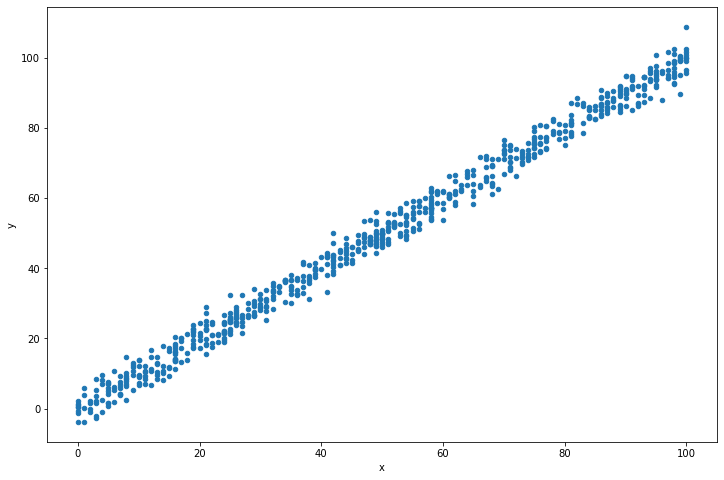

In [8]:
data1.plot(kind='scatter',x='x',y='y',figsize=(12,8))

由上图可知，可以拟合出一元线性模型

In [9]:
cols1=data1.shape[1]
X1=data1.iloc[:,0:cols1-1]
y1=data1.iloc[:,cols1-1:cols1]
cols2=data2.shape[1]
X2=data2.iloc[:,0:cols2-1]
y2=data2.iloc[:,cols2-1:cols2]

## 1.使用sklearn库 

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(X1,y1)
y_pred=lr.predict(X2)

D:\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
D:\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).

所得到的拟合直线的斜率w

In [11]:
lr.coef_

array([[1.00065638]])

拟合直线的截距b

In [12]:
lr.intercept_ 

array([-0.10726546])

对模型进行评分

In [13]:
score=lr.score(y2,y_pred) 
score

0.9883886222259362

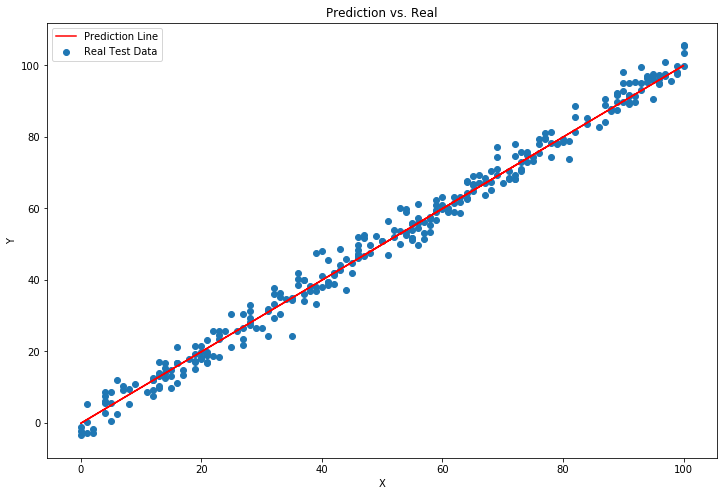

In [14]:
#绘制测试集的预测结果与真实结果的对比图
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(X2,y_pred,'r',label='Prediction Line')
ax.scatter(X2,y2,label='Real Test Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Prediction vs. Real')
ax.legend(loc=2)

## 使用梯度下降法(使用训练集data1中的X1与y1进行训练）

在x1中插入一列名为Ones，值为1的列

In [15]:
X1.insert(0,'Ones',1)

In [16]:
X1.head()

,Ones,x
0,1,24.0
1,1,50.0
2,1,15.0
3,1,38.0
4,1,87.0


将X1，y1转换为矩阵，并对theta初始化

In [17]:
X1=np.matrix(X1.values)
y1=np.matrix(y1.values)
theta=np.matrix(np.array([0,0]))

查看theta，是一个一行两列的矩阵[1,2]

In [18]:
theta

matrix([[0, 0]])

查看X1，y1，theta的维度

In [19]:
X1.shape,y1.shape,theta.shape

((699, 2), (699, 1), (1, 2))

定义损失函数（均方误差代价函数）

In [20]:
def computeCost(X,y,theta):
    inner=np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

计算当theta为0的时候，它的损失函数

In [21]:
computeCost(X1,y1,theta)

1670.0624130893364

定义迭代梯度下降函数

In [22]:
def gradientDescent(X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1])
    cost=np.zeros(iters)
    
    for i in range(iters):
        error=(X*theta.T)-y
        for j in range(parameters):
            term=np.multiply(error,X[:,:j])
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))
            
        theta=temp
        cost[i]=computeCost(X,y,theta)
    return theta,cost

初始化alpha，iters，给定他们合适的数值

In [23]:
alpha=0.01
iters=10000

在X1，y1的条件下，所得到的系数,分别为b,w

In [24]:
g,cost=gradientDescent(X1,y1,theta,alpha,iters)
g

matrix([[0.        , 0.99851169]])

X1的预测值为f

In [25]:
f=g[0,0]+(g[0,1]*X1)
f

matrix([[ 0.99851169, 23.96428047],
        [ 0.99851169, 49.92558431],
        [ 0.99851169, 14.97767529],
        ...,
        [ 0.99851169, 81.87795827],
        [ 0.99851169, 65.90177129],
        [ 0.99851169, 96.85563356]])

最终的损失函数

In [26]:
computeCost(X1,y1,g)

3.9358017337907336

绘制训练集中的真实数据和拟合曲线的对比图

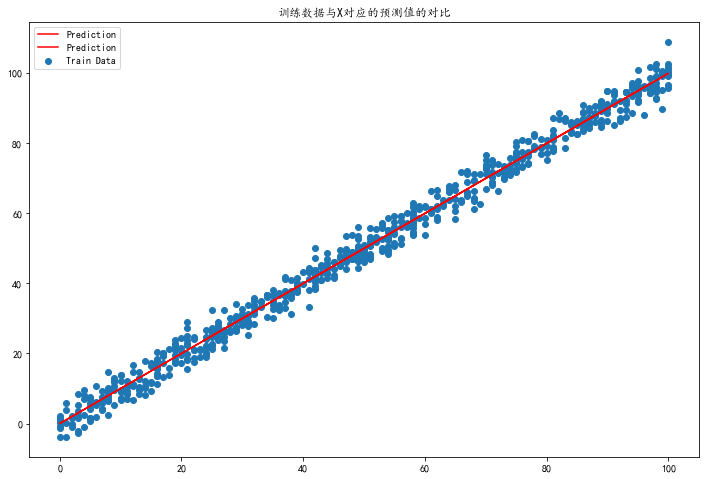

In [39]:
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
plt.figure(figsize=(12,8))
plt.scatter(data1.x,data1.y,label='Train Data')
plt.plot(X1,f,'r',label='Prediction')
plt.legend(loc=2)
plt.title('训练数据与X对应的预测值的对比')
plt.show()